In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns


In [101]:
customer = pd.read_csv(r'C:\Users\Nidhi sharma\OneDrive\Documents\DATABASE CLASSES\case study python\Python Foundation Case Study 1 - Retail Case Study\Customer.csv')
customer.head(5)

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


In [5]:
transactions = pd.read_csv(r'C:\Users\Nidhi sharma\OneDrive\Documents\DATABASE CLASSES\case study python\Python Foundation Case Study 1 - Retail Case Study\Transactions.csv')
transactions.head(5)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


In [4]:
prod_cat_info = pd.read_csv(r'C:\Users\Nidhi sharma\OneDrive\Documents\DATABASE CLASSES\case study python\Python Foundation Case Study 1 - Retail Case Study\prod_cat_info.csv')
prod_cat_info.head(5)

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


##### Exploratory Data Analysis

In [7]:
prod_cat_info = prod_cat_info.rename(columns= {"prod_sub_cat_code":"prod_subcat_code"})
prod_cat_info

,prod_cat_code,prod_cat,prod_subcat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women
5,2,Footwear,4,Kids
6,3,Electronics,4,Mobiles
7,3,Electronics,5,Computers
8,3,Electronics,8,Personal Appliances
9,3,Electronics,9,Cameras


In [8]:
customer.shape

(5647, 4)

In [9]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_Id  5647 non-null   int64  
 1   DOB          5647 non-null   object 
 2   Gender       5645 non-null   object 
 3   city_code    5645 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 176.6+ KB


In [10]:
transactions.shape

(23053, 10)

In [11]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    23053 non-null  int64  
 1   cust_id           23053 non-null  int64  
 2   tran_date         23053 non-null  object 
 3   prod_subcat_code  23053 non-null  int64  
 4   prod_cat_code     23053 non-null  int64  
 5   Qty               23053 non-null  int64  
 6   Rate              23053 non-null  int64  
 7   Tax               23053 non-null  float64
 8   total_amt         23053 non-null  float64
 9   Store_type        23053 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.8+ MB


In [12]:
prod_cat_info.shape

(23, 4)

In [13]:
prod_cat_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   prod_cat_code     23 non-null     int64 
 1   prod_cat          23 non-null     object
 2   prod_subcat_code  23 non-null     int64 
 3   prod_subcat       23 non-null     object
dtypes: int64(2), object(2)
memory usage: 864.0+ bytes


In [14]:
cust_concat = pd.merge(left = customer, right = transactions, left_on='customer_Id',right_on='cust_id',how='inner')

In [15]:
cust_concat.head(4)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop
1,268408,02-01-1970,M,4.0,16197868036,268408,16-12-2013,1,4,-5,-210,110.250,-1160.250,Flagship store
2,268408,02-01-1970,M,4.0,16197868036,268408,12/12/2013,1,4,5,210,110.250,1160.250,Flagship store
3,268408,02-01-1970,M,4.0,28810141075,268408,2/9/2013,10,6,2,813,170.730,1796.730,TeleShop


In [17]:
cust_concat.isnull().sum()

customer_Id         0
DOB                 0
Gender              9
city_code           8
transaction_id      0
cust_id             0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
dtype: int64

In [18]:
customer_Final=cust_concat.merge(prod_cat_info, how="inner", left_on=["prod_cat_code","prod_subcat_code"],
                                                             right_on=["prod_cat_code","prod_subcat_code"])

In [21]:
customer_Final.head(5)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,Fiction
1,275152,16-01-1970,M,4.0,73109425404,275152,25-03-2011,7,5,2,464,97.440,1025.440,e-Shop,Books,Fiction
2,275034,18-01-1970,F,4.0,64777271023,275034,23-05-2011,7,5,2,197,41.370,435.370,Flagship store,Books,Fiction
3,270829,22-01-1970,F,8.0,87174343938,270829,9/12/2013,7,5,4,1141,479.220,5043.220,e-Shop,Books,Fiction
4,267657,29-01-1970,F,7.0,76242744953,267657,23-05-2013,7,5,4,1020,428.400,4508.400,e-Shop,Books,Fiction


In [22]:
customer_Final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23053 entries, 0 to 23052
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_Id       23053 non-null  int64  
 1   DOB               23053 non-null  object 
 2   Gender            23044 non-null  object 
 3   city_code         23045 non-null  float64
 4   transaction_id    23053 non-null  int64  
 5   cust_id           23053 non-null  int64  
 6   tran_date         23053 non-null  object 
 7   prod_subcat_code  23053 non-null  int64  
 8   prod_cat_code     23053 non-null  int64  
 9   Qty               23053 non-null  int64  
 10  Rate              23053 non-null  int64  
 11  Tax               23053 non-null  float64
 12  total_amt         23053 non-null  float64
 13  Store_type        23053 non-null  object 
 14  prod_cat          23053 non-null  object 
 15  prod_subcat       23053 non-null  object 
dtypes: float64(3), int64(7), object(6)
memor

2. Prepare a summary report for the merged data set.

 a. Get the column names and their corresponding data types


In [23]:
customer_Final.dtypes

customer_Id           int64
DOB                  object
Gender               object
city_code           float64
transaction_id        int64
cust_id               int64
tran_date            object
prod_subcat_code      int64
prod_cat_code         int64
Qty                   int64
Rate                  int64
Tax                 float64
total_amt           float64
Store_type           object
prod_cat             object
prod_subcat          object
dtype: object

In [26]:
customer_Final['DOB'] = customer_Final['DOB'].apply(lambda x :pd.to_datetime(x))
customer_Final['tran_date'] = customer_Final['tran_date'].apply(lambda x :pd.to_datetime(x))

In [27]:
customer_Final.dtypes

customer_Id                  int64
DOB                 datetime64[ns]
Gender                      object
city_code                  float64
transaction_id               int64
cust_id                      int64
tran_date           datetime64[ns]
prod_subcat_code             int64
prod_cat_code                int64
Qty                          int64
Rate                         int64
Tax                        float64
total_amt                  float64
Store_type                  object
prod_cat                    object
prod_subcat                 object
dtype: object

In [28]:
customer_Final.isnull().sum()

customer_Id         0
DOB                 0
Gender              9
city_code           8
transaction_id      0
cust_id             0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
prod_cat            0
prod_subcat         0
dtype: int64

In [29]:
customer_Final.duplicated().sum()

13

In [30]:
customer_Final.drop_duplicates(inplace=True)

In [31]:
customer_Final.duplicated().sum()

0

b. Top/Bottom 10 observations

In [33]:
customer_Final.head(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,1970-02-01,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,Books,Fiction
1,275152,1970-01-16,M,4.0,73109425404,275152,2011-03-25,7,5,2,464,97.440,1025.440,e-Shop,Books,Fiction
2,275034,1970-01-18,F,4.0,64777271023,275034,2011-05-23,7,5,2,197,41.370,435.370,Flagship store,Books,Fiction
3,270829,1970-01-22,F,8.0,87174343938,270829,2013-09-12,7,5,4,1141,479.220,5043.220,e-Shop,Books,Fiction
4,267657,1970-01-29,F,7.0,76242744953,267657,2013-05-23,7,5,4,1020,428.400,4508.400,e-Shop,Books,Fiction
5,274630,1970-01-02,M,4.0,78357345891,274630,2012-11-04,7,5,1,646,67.830,713.830,TeleShop,Books,Fiction
6,273541,1970-01-02,M,4.0,23916816961,273541,2013-09-02,7,5,4,410,172.200,1812.200,e-Shop,Books,Fiction
7,269008,1970-02-13,F,6.0,35560569829,269008,2013-09-03,7,5,1,1441,151.305,1592.305,e-Shop,Books,Fiction
8,269008,1970-02-13,F,6.0,94033312891,269008,2012-04-26,7,5,5,746,391.650,4121.650,MBR,Books,Fiction
9,267199,1970-02-14,NaN,2.0,56749259881,267199,2012-11-01,7,5,4,1049,440.580,4636.580,MBR,Books,Fiction


In [34]:
customer_Final.tail(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
23043,268914,1992-11-15,F,3.0,1407823655,268914,2011-10-06,10,5,1,1252,131.460,1383.460,MBR,Books,Non-Fiction
23044,269519,1992-11-17,M,9.0,29719500605,269519,2013-12-24,10,5,4,1036,435.120,4579.120,TeleShop,Books,Non-Fiction
23045,273524,1992-11-25,F,1.0,25762805863,273524,2012-11-19,10,5,1,1401,147.105,1548.105,Flagship store,Books,Non-Fiction
23046,272141,1992-02-12,F,10.0,71337087467,272141,2012-07-22,10,5,-3,-1422,447.930,-4713.930,e-Shop,Books,Non-Fiction
23047,272141,1992-02-12,F,10.0,71337087467,272141,2012-07-16,10,5,3,1422,447.930,4713.930,e-Shop,Books,Non-Fiction
23048,267812,1992-04-12,F,1.0,63540378797,267812,2012-10-10,10,5,3,224,70.560,742.560,TeleShop,Books,Non-Fiction
23049,274618,1992-09-12,F,7.0,71793203305,274618,2013-08-17,10,5,4,691,290.220,3054.220,Flagship store,Books,Non-Fiction
23050,268097,1992-12-15,F,7.0,91217108818,268097,2012-01-02,10,5,2,411,86.310,908.310,e-Shop,Books,Non-Fiction
23051,268097,1992-12-15,F,7.0,90114483354,268097,2011-01-31,10,5,-4,-1408,591.360,-6223.360,e-Shop,Books,Non-Fiction
23052,268097,1992-12-15,F,7.0,90114483354,268097,2011-01-26,10,5,4,1408,591.360,6223.360,e-Shop,Books,Non-Fiction


c. “Five-number summary”

In [36]:
customer_Final['total_amt'].describe()

count    23040.000000
mean      2109.865226
std       2505.610295
min      -8270.925000
25%        762.450000
50%       1756.950000
75%       3570.255000
max       8287.500000
Name: total_amt, dtype: float64

d. Frequency tables for all the categorical variables

In [38]:
customer_Final.loc[:,customer_Final.dtypes=="object"].describe()

,Gender,Store_type,prod_cat,prod_subcat
count,23031,23040,23040,23040
unique,2,4,6,18
top,M,e-Shop,Books,Women
freq,11804,9304,6066,3046


3. Generate histograms for all continuous variables and frequency bars for categorical variables

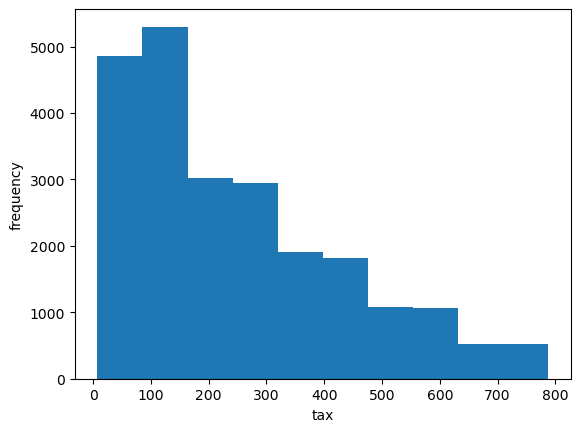

In [44]:
# For Continuous
Tax = customer_Final['Tax']
plt.hist(Tax)
plt.xlabel('tax')
plt.ylabel('frequency')
plt.show()

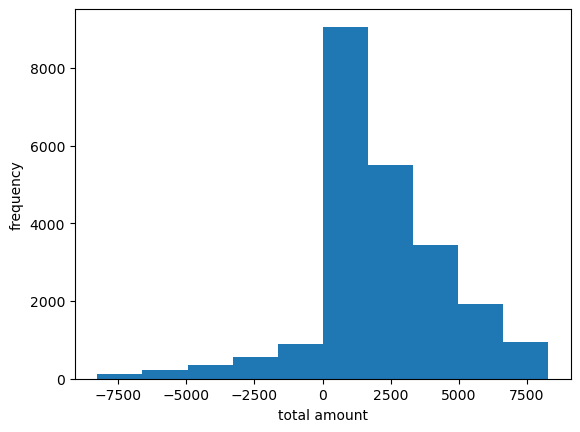

In [43]:
# For Total Amount
Total_Amount=customer_Final["total_amt"]
plt.hist(Total_Amount)
plt.xlabel("total amount")
plt.ylabel("frequency")
plt.show()

<AxesSubplot:>

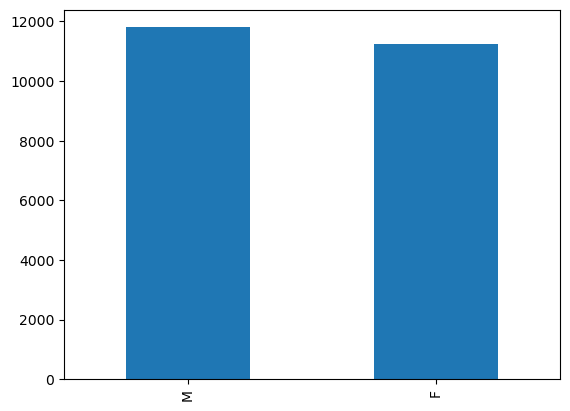

In [41]:
# For Categorical Variable
# For Gender
customer_Final['Gender'].value_counts().plot(kind='bar')

<AxesSubplot:>

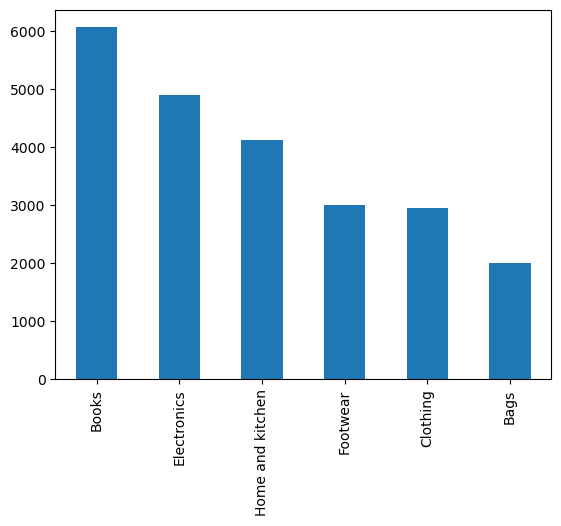

In [42]:
# For prod_code
customer_Final['prod_cat'].value_counts().plot(kind='bar')

<AxesSubplot:>

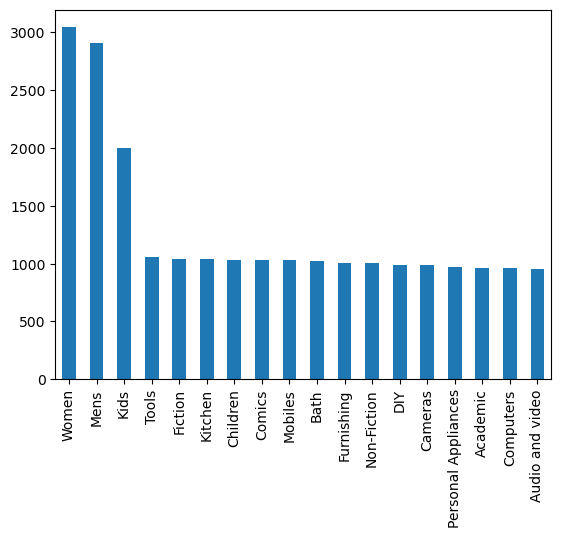

In [45]:
# For prod_subcat
customer_Final['prod_subcat'].value_counts().plot(kind='bar')

<AxesSubplot:>

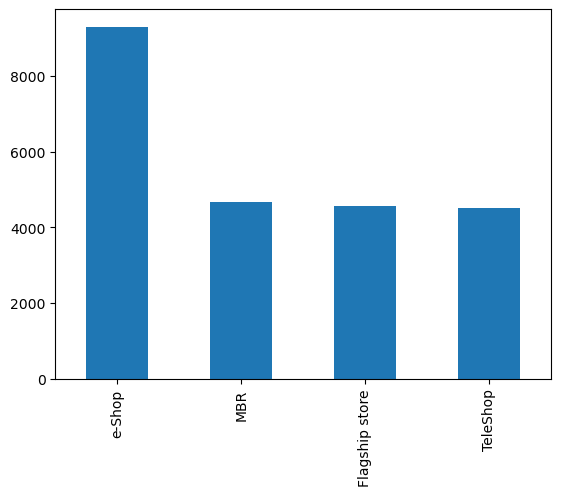

In [46]:
# ForStore_type
customer_Final['Store_type'].value_counts().plot(kind='bar')

4. Calculate the following information using the merged dataset :


 a. Time period of the available transaction data

In [48]:
min_date = customer_Final['tran_date'].min()
min_date

Timestamp('2011-01-02 00:00:00')

In [49]:
max_date = customer_Final['tran_date'].max()
max_date

Timestamp('2014-12-02 00:00:00')

In [50]:
print("Time period of the available transaction data is from " + pd.Timestamp.strftime(min_date,format="%d-%m-%y") + " to " 
     + pd.Timestamp.strftime(max_date,format="%d-%m-%y"))

Time period of the available transaction data is from 02-01-11 to 02-12-14


b. Count of transactions where the total amount of transaction was negative

In [52]:
transaction_negative = customer_Final[customer_Final['total_amt']<0].count()
transaction_negative

customer_Id         2164
DOB                 2164
Gender              2163
city_code           2164
transaction_id      2164
cust_id             2164
tran_date           2164
prod_subcat_code    2164
prod_cat_code       2164
Qty                 2164
Rate                2164
Tax                 2164
total_amt           2164
Store_type          2164
prod_cat            2164
prod_subcat         2164
dtype: int64

5. Analyze which product categories are more popular among females vs male customers.

In [53]:
customer_Final.groupby(['prod_cat','Gender'])[['Qty']].count().sort_values(by='Qty',ascending = False)

Qty
prod_cat         Gender      
Books            M       3116
                 F       2946
Electronics      M       2567
                 F       2328
Home and kitchen M       2132
                 F       1993
Footwear         F       1528
Clothing         M       1518
Footwear         M       1467
Clothing         F       1439
Bags             M       1004
                 F        993

6. Which City code has the maximum customers and what was the percentage of customers from 
that city?

In [55]:
c1=customer_Final['city_code'].value_counts()
c1

4.0     2422
3.0     2410
5.0     2357
7.0     2356
10.0    2333
8.0     2328
2.0     2268
1.0     2255
9.0     2176
6.0     2127
Name: city_code, dtype: int64

In [56]:
c2=customer_Final['city_code'].count()
c2

23032

In [57]:
c3 = (c1/c2)*100
c3

4.0     10.515804
3.0     10.463703
5.0     10.233588
7.0     10.229246
10.0    10.129385
8.0     10.107676
2.0      9.847169
1.0      9.790726
9.0      9.447725
6.0      9.234977
Name: city_code, dtype: float64

In [58]:
customer_Final['Store_type'].value_counts()

e-Shop            9304
MBR               4660
Flagship store    4575
TeleShop          4501
Name: Store_type, dtype: int64

7. Which store type sells the maximum products by value and by quantity?

In [60]:
customer_Final.sort_values(['Rate','Qty'],ascending=False).head(1)['Store_type']

3184    e-Shop
Name: Store_type, dtype: object

8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?


In [63]:
total1=customer_Final[(customer_Final['Store_type']== 'Flagship store') &
                     ((customer_Final['prod_cat']=='Electronics') |
                     (customer_Final['prod_cat']=='Clothing'))]['total_amt'].sum()
total1

3409559.27

9.What was the total amount earned from "Male" customers under the "Electronics" category?

In [64]:
total2=customer_Final[(customer_Final['Gender']== 'M') & (customer_Final['prod_cat']=='Electronics')]['total_amt'].sum()
total2

5711351.619999999

 10.How many customers have more than 10 unique transactions, after removing all transactions 
which have any negative amounts?

In [65]:
unique=customer_Final.loc[customer_Final['total_amt']>0]
unique

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,1970-02-01,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,Books,Fiction
1,275152,1970-01-16,M,4.0,73109425404,275152,2011-03-25,7,5,2,464,97.440,1025.440,e-Shop,Books,Fiction
2,275034,1970-01-18,F,4.0,64777271023,275034,2011-05-23,7,5,2,197,41.370,435.370,Flagship store,Books,Fiction
3,270829,1970-01-22,F,8.0,87174343938,270829,2013-09-12,7,5,4,1141,479.220,5043.220,e-Shop,Books,Fiction
4,267657,1970-01-29,F,7.0,76242744953,267657,2013-05-23,7,5,4,1020,428.400,4508.400,e-Shop,Books,Fiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23047,272141,1992-02-12,F,10.0,71337087467,272141,2012-07-16,10,5,3,1422,447.930,4713.930,e-Shop,Books,Non-Fiction
23048,267812,1992-04-12,F,1.0,63540378797,267812,2012-10-10,10,5,3,224,70.560,742.560,TeleShop,Books,Non-Fiction
23049,274618,1992-09-12,F,7.0,71793203305,274618,2013-08-17,10,5,4,691,290.220,3054.220,Flagship store,Books,Non-Fiction
23050,268097,1992-12-15,F,7.0,91217108818,268097,2012-01-02,10,5,2,411,86.310,908.310,e-Shop,Books,Non-Fiction


In [66]:
unique_trans = unique.groupby(['customer_Id','prod_cat','prod_subcat'])['transaction_id'].count().reset_index()
unique_trans 

,customer_Id,prod_cat,prod_subcat,transaction_id
0,266783,Books,Non-Fiction,1
1,266783,Clothing,Mens,2
2,266783,Footwear,Mens,1
3,266784,Books,Fiction,1
4,266784,Books,Non-Fiction,1
...,...,...,...,...
19273,275264,Books,Non-Fiction,1
19274,275264,Home and kitchen,Tools,1
19275,275265,Bags,Mens,1
19276,275265,Books,Academic,1


In [67]:
unique_transaction = unique_trans.groupby('customer_Id')[['transaction_id']].count().sort_values(by='transaction_id',ascending=False)
unique_transaction

,transaction_id
customer_Id,
270908,10
272286,10
274854,10
273014,10
268076,9
...,...
270259,1
270265,1
267996,1


In [68]:
unique_transaction[unique_transaction["transaction_id"]>10]

,transaction_id
customer_Id,


11. For all customers aged between 25 - 35, find out:

 

In [70]:
curr_year=pd.to_datetime('today').year
curr_year

2023

In [69]:
customer_Final["DOB_year"]=customer_Final["DOB"].dt.year
customer_Final

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB_year
0,268408,1970-02-01,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,Books,Fiction,1970
1,275152,1970-01-16,M,4.0,73109425404,275152,2011-03-25,7,5,2,464,97.440,1025.440,e-Shop,Books,Fiction,1970
2,275034,1970-01-18,F,4.0,64777271023,275034,2011-05-23,7,5,2,197,41.370,435.370,Flagship store,Books,Fiction,1970
3,270829,1970-01-22,F,8.0,87174343938,270829,2013-09-12,7,5,4,1141,479.220,5043.220,e-Shop,Books,Fiction,1970
4,267657,1970-01-29,F,7.0,76242744953,267657,2013-05-23,7,5,4,1020,428.400,4508.400,e-Shop,Books,Fiction,1970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,267812,1992-04-12,F,1.0,63540378797,267812,2012-10-10,10,5,3,224,70.560,742.560,TeleShop,Books,Non-Fiction,1992
23049,274618,1992-09-12,F,7.0,71793203305,274618,2013-08-17,10,5,4,691,290.220,3054.220,Flagship store,Books,Non-Fiction,1992
23050,268097,1992-12-15,F,7.0,91217108818,268097,2012-01-02,10,5,2,411,86.310,908.310,e-Shop,Books,Non-Fiction,1992
23051,268097,1992-12-15,F,7.0,90114483354,268097,2011-01-31,10,5,-4,-1408,591.360,-6223.360,e-Shop,Books,Non-Fiction,1992


In [71]:
customer_Final["age"]=curr_year - customer_Final["DOB_year"]

In [72]:
customer_Final

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB_year,age
0,268408,1970-02-01,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,Books,Fiction,1970,53
1,275152,1970-01-16,M,4.0,73109425404,275152,2011-03-25,7,5,2,464,97.440,1025.440,e-Shop,Books,Fiction,1970,53
2,275034,1970-01-18,F,4.0,64777271023,275034,2011-05-23,7,5,2,197,41.370,435.370,Flagship store,Books,Fiction,1970,53
3,270829,1970-01-22,F,8.0,87174343938,270829,2013-09-12,7,5,4,1141,479.220,5043.220,e-Shop,Books,Fiction,1970,53
4,267657,1970-01-29,F,7.0,76242744953,267657,2013-05-23,7,5,4,1020,428.400,4508.400,e-Shop,Books,Fiction,1970,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,267812,1992-04-12,F,1.0,63540378797,267812,2012-10-10,10,5,3,224,70.560,742.560,TeleShop,Books,Non-Fiction,1992,31
23049,274618,1992-09-12,F,7.0,71793203305,274618,2013-08-17,10,5,4,691,290.220,3054.220,Flagship store,Books,Non-Fiction,1992,31
23050,268097,1992-12-15,F,7.0,91217108818,268097,2012-01-02,10,5,2,411,86.310,908.310,e-Shop,Books,Non-Fiction,1992,31
23051,268097,1992-12-15,F,7.0,90114483354,268097,2011-01-31,10,5,-4,-1408,591.360,-6223.360,e-Shop,Books,Non-Fiction,1992,31


a. What was the total amount spent for “Electronics” and “Books” product categories?

In [73]:
total_spend=customer_Final[((customer_Final['prod_cat']=='Electronics') | 
                            (customer_Final['prod_cat']=='Books')) & 
                            (customer_Final['age']>=25) & (customer_Final['age']<=35)]['total_amt'].sum() 

In [74]:
total_spend

4940387.595

b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014.

In [90]:
customer_age=customer_Final[(customer_Final['age']>=25) & (customer_Final['age']<=35)] 
customer_age

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB_year,age
823,270463,1988-06-01,M,9.0,56287350550,270463,2011-06-09,7,5,2,1112,233.520,2457.520,e-Shop,Books,Fiction,1988,35
824,270388,1988-01-22,M,9.0,73882970999,270388,2012-09-20,7,5,4,730,306.600,3226.600,Flagship store,Books,Fiction,1988,35
825,273785,1988-01-22,M,5.0,79369372618,273785,2013-09-12,7,5,2,456,95.760,1007.760,TeleShop,Books,Fiction,1988,35
826,268773,1988-08-02,M,1.0,68033148936,268773,2012-01-24,7,5,1,827,86.835,913.835,e-Shop,Books,Fiction,1988,35
827,270096,1988-02-28,M,10.0,83330815681,270096,2012-11-21,7,5,4,185,77.700,817.700,MBR,Books,Fiction,1988,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,267812,1992-04-12,F,1.0,63540378797,267812,2012-10-10,10,5,3,224,70.560,742.560,TeleShop,Books,Non-Fiction,1992,31
23049,274618,1992-09-12,F,7.0,71793203305,274618,2013-08-17,10,5,4,691,290.220,3054.220,Flagship store,Books,Non-Fiction,1992,31
23050,268097,1992-12-15,F,7.0,91217108818,268097,2012-01-02,10,5,2,411,86.310,908.310,e-Shop,Books,Non-Fiction,1992,31
23051,268097,1992-12-15,F,7.0,90114483354,268097,2011-01-31,10,5,-4,-1408,591.360,-6223.360,e-Shop,Books,Non-Fiction,1992,31


In [96]:
total_amount = customer_Final [((customer_Final['tran_date'] >='2014-01-01')
                           & (customer_Final['tran_date'] <='2014-03-01'))
                           & (customer_Final['age']>=25) & (customer_Final['age']<=35)]['total_amt'].sum()


In [97]:
total_amount

377575.18500000006